Waste Management using CNN Model


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_path="Dataset/TRAIN"
test_path="Dataset/TEST"

In [4]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [7]:


x_data, y_data = [], []
for category in glob(train_path + "/*"):
    for file in tqdm(glob(category + "/*")):
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (150, 150))  
        x_data.append(img)
        y_data.append(category.split('/')[-1])


100%|██████████| 9999/9999 [01:14<00:00, 134.47it/s]


In [8]:
data = pd.DataFrame({'image':x_data,"label":y_data})
data.shape


(22564, 2)

In [9]:
# Convert to NumPy arrays and normalize
x_data = np.array(x_data) / 255.0

# Label Encoding
from sklearn.preprocessing import LabelEncoder
from glob import glob
from tensorflow.keras.utils import to_categorical
encoder = LabelEncoder()
y_data = encoder.fit_transform(y_data)
y_data = to_categorical(y_data)  # Convert labels to one-hot encoding

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, stratify=y_data, random_state=42)

Label Distribution - Pie Chart

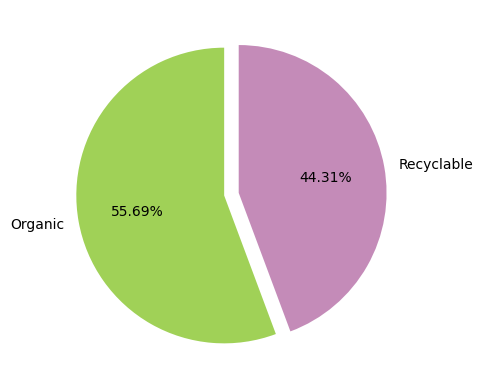

In [18]:
colors = ["#a0d157", "#c48bb8"]
plt.pie(data.label.value_counts(), labels = ["Organic","Recyclable"], autopct = '%0.2f%%', colors = colors, startangle = 90, explode = [0.05, 0.05] ) #explode is optional
plt.show()

Label Frequency (Bar Plot)

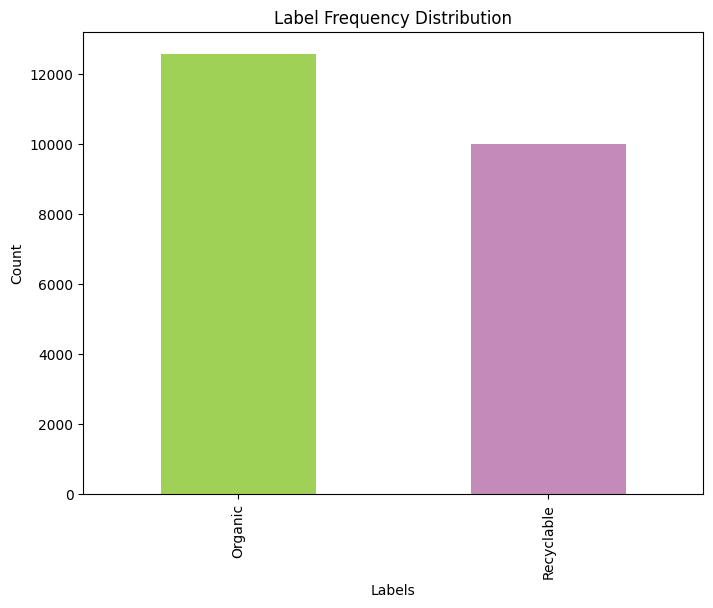

In [19]:
data['label'] = data['label'].replace({'TRAIN\O': 'Organic', 'TRAIN\R': 'Recyclable'})
plt.figure(figsize=(8, 6))
data['label'].value_counts().plot(kind='bar', color=colors)
plt.title('Label Frequency Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

Image Size Distribution (Histogram)

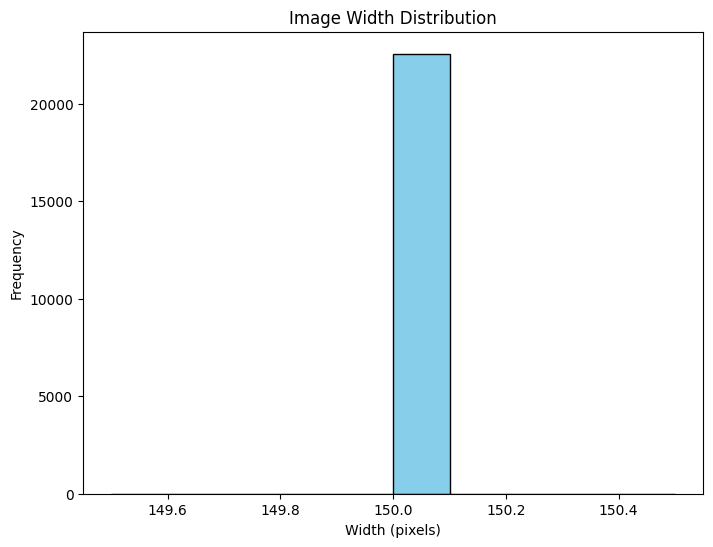

In [20]:
image_sizes = [img.shape[0] for img in x_data] 
plt.figure(figsize=(8, 6))
plt.hist(image_sizes, bins=10, color='skyblue', edgecolor='black')
plt.title('Image Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.show()


Image Preview

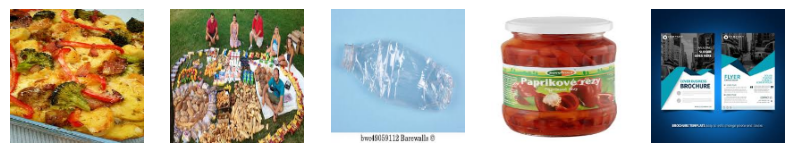

In [21]:
sample_images = np.random.choice(data['image'], 5)  
plt.figure(figsize=(10, 10))

for i, img in enumerate(sample_images):
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

**WEEK 2**

CNN - Convolutional Neural Network

In [22]:
# Model Architecture
def build_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
        MaxPooling2D(2,2),
        BatchNormalization(),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(y_train.shape[1], activation='softmax')
    ])
    return model

In [23]:
# Compile Model
model = build_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 204s 354ms/step - accuracy: 0.7612 - loss: 1.2071 - val_accuracy: 0.7678 - val_loss: 0.6901
Epoch 2/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 192s 339ms/step - accuracy: 0.8659 - loss: 0.4307 - val_accuracy: 0.8509 - val_loss: 0.5011
Epoch 3/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 192s 339ms/step - accuracy: 0.9098 - loss: 0.2675 - val_accuracy: 0.8409 - val_loss: 0.5523
Epoch 4/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 215s 381ms/step - accuracy: 0.9447 - loss: 0.1606 - val_accuracy: 0.8564 - val_loss: 0.5374
Epoch 5/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 223s 394ms/step - accuracy: 0.9561 - loss: 0.1325 - val_accuracy: 0.8387 - val_loss: 0.5852
Epoch 6/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 216s 382ms/step - accuracy: 0.9693 - loss: 0.0894 - val_accuracy: 0.8498 - val_loss: 0.7585
Epoch 7/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 214s 379ms/step - accuracy: 0.9642 - loss: 0.1077 - val_accuracy: 0.8462 - val_loss: 0.6613
Epoch 8/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 212s 375ms/step - accuracy: 0.9592 -

In [24]:
loss, accuracy = model.evaluate(x_val, y_val)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


142/142 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.8434 - loss: 0.8518
Validation Loss: 0.8343
Validation Accuracy: 0.8473


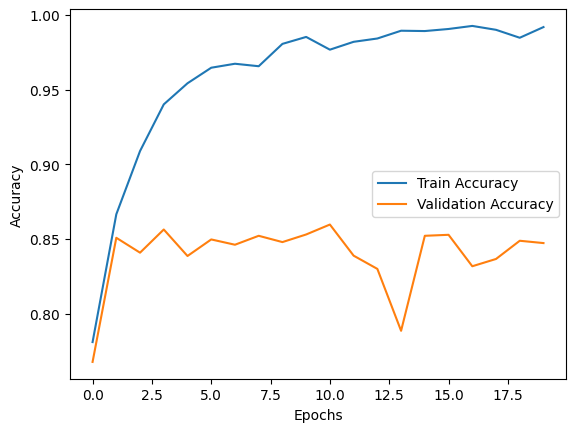

In [25]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [26]:
# Prediction on Test Images
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150)) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    predicted_label = encoder.inverse_transform([np.argmax(prediction)])[0]
    return predicted_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


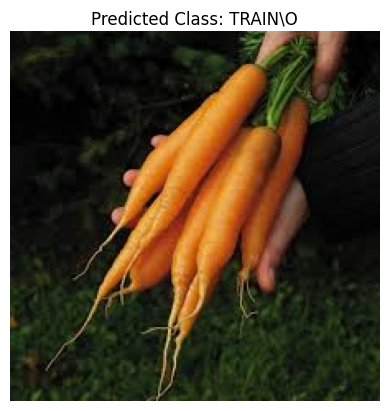

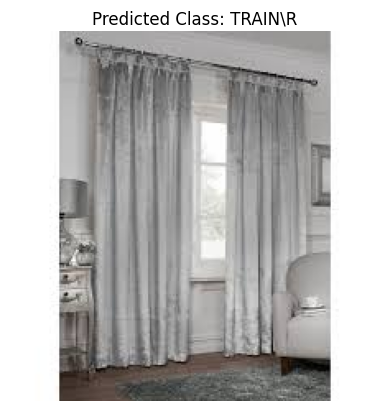

In [27]:
import matplotlib.pyplot as plt
sample_image1 = "Dataset\TEST\O\O_12569.jpg"  
sample_image2 = "Dataset\TEST\R\R_10010.jpg"
predicted_class = predict_image(sample_image1)
predicted_class2= predict_image(sample_image2)
image = cv2.imread(sample_image1)  
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off') 
plt.show()
image2 = cv2.imread(sample_image2)  
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)
plt.title(f"Predicted Class: {predicted_class2}")
plt.axis('off') 
plt.show()

 Performance Evaluation: Summary, Training Metrics, and Classification Analysis

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 74, 74, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,105,864 (217.84 MB)

 Trainable params: 19,035,138 (72.61 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 38,070,278 (145.23 MB)

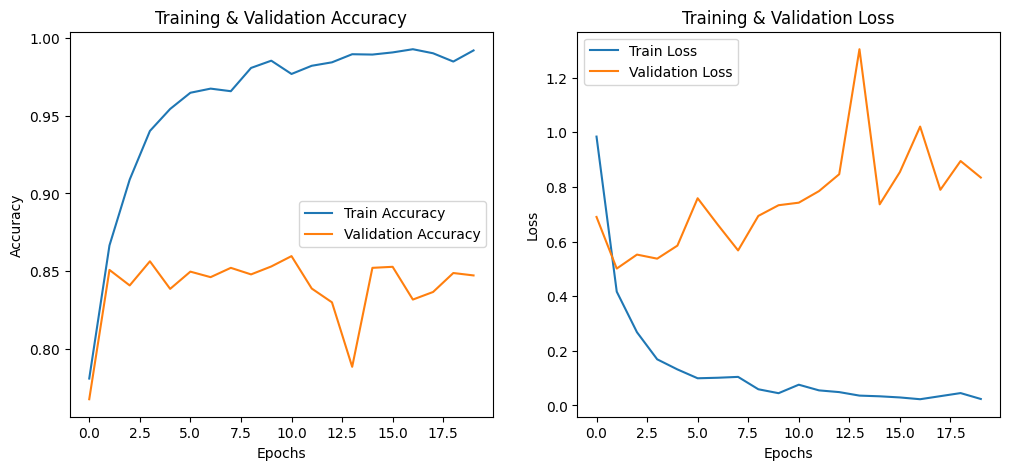

142/142 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step


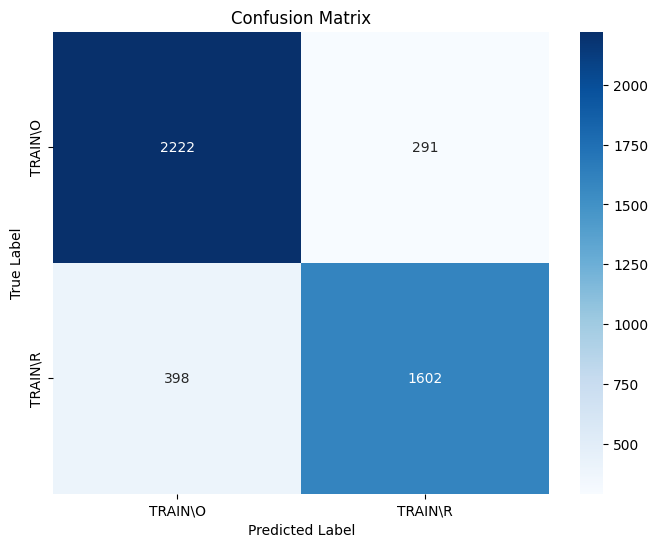

Classification Report:
               precision    recall  f1-score   support

     TRAIN\O       0.85      0.88      0.87      2513
     TRAIN\R       0.85      0.80      0.82      2000

    accuracy                           0.85      4513
   macro avg       0.85      0.84      0.84      4513
weighted avg       0.85      0.85      0.85      4513



In [28]:
# Display Model Summary
model.summary()

# Plot Training & Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()

# Confusion Matrix & Classification Report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on validation data
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=encoder.classes_))


In [29]:
model.save("waste_management_cnn.h5") 

Improving the model

1. Data Augmentation

In [30]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)


In [39]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))  
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0  # Normalize

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)  
    class_label = ['Organic', 'Recyclable']  

    class_label = class_label[class_idx]  

    print(f"Predicted class: {class_label}")


predict_image("Dataset\TEST\O\O_12571.jpg", model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted class: Organic
